<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработка выбросов</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-исследования" data-toc-modified-id="Подготовка-данных-для-исследования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных для исследования</a></span></li><li><span><a href="#Простое-преобразование-признаков-" data-toc-modified-id="Простое-преобразование-признаков--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Простое преобразование признаков <a id="simple_feature_conversion"></a></a></span></li><li><span><a href="#Алгоритм-преобразования-" data-toc-modified-id="Алгоритм-преобразования--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования <a id="conversion_algorithm"></a></a></span></li><li><span><a href="#Тестирование-алгоритма" data-toc-modified-id="Тестирование-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование алгоритма</a></span></li><li><span><a href="#Итоги-проекта" data-toc-modified-id="Итоги-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги проекта</a></span></li></div>

# Защита персональных данных клиентов

Страховой компании необходимо разработать такой метод преобразования данных, который позволит защитить данные клиентов.

**Цель исследования**
  1. Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.
  2. Обосновать корректность его работы.
  3. Требуется, чтобы метод, при преобразовании данных, не ухудшал качество моделей машинного обучения. 
  4. Необходимо использовать матричные операции для метода преобразования данных. 
  5. Необходимо использовать метрику R2, при тестировании качества модели модели машинного обучения, до и после преобразованния данных.


**Исследование пройдёт в шесть этапов:**
 1. Обзор данных;
 2. Предобработка данных;
 3. Подготовка данных для исследования;
 4. Простое преобразование признаков;
 5. Алгоритм преобразования;
 6. Тестирование алгоритма.

**1. Импортируем библиотеку pandas и другие. Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`.**

In [ ]:
# обновим библиотеку 'pandas' до последней версии
!pip install --upgrade pandas

# обновим библиотеку 'scikit-learn' до последней версии
!pip install --upgrade scikit-learn

# обновим библиотеку 'matplotlib' до последней версии
!pip install --upgrade matplotlib

# обновим библиотеку 'seaborn' до последней версии
!pip install --upgrade seaborn

In [1]:
# импорт библиотеки 'pandas'
import pandas as pd

# импорт библиотеки 'numpy'
import numpy as np

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import matplotlib.pyplot as plt

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import seaborn as sns

# импорт библиотеки для модели "линейной регрессии"
from sklearn.linear_model import LinearRegression

# импорт библиотеки для оценки качества модели
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_squared_log_error,
                             r2_score,
                             mean_absolute_percentage_error,
                             make_scorer)

In [2]:
try:
    # читаем данные из csv-файла и сохраняем их в виде датафрейма в 'df',
    df = pd.read_csv('***')
    
except:
    # в случае отсутствия csv-файла в локальном месторасположении, читаем его из облачного хранилища
    # и сохраняем данные в виде датафрейма в 'df', 
    
    df = pd.read_csv('***')

**2. Выведем первые пять строчек датафрейма `df` на экран.**

In [3]:
# посмотрим первых пять строк датафрейма 'df
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


**3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
# получение общей информации о данных в датафрейме 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Итак, в таблице 14 столбцов. Типы данных в столбцах — `float64`, `int64` и `object`.

* `Пол` — пол застрахованного,
* `Возраст` — возраст застрахованного,
* `Зарплата` — зарплата застрахованного,
* `Члены семьи` — количество членов семьи застрахованного,
* `Страховые выплаты` — количество страховых выплат клиенту (застрахованному) за последние 5 лет.

Количество значений в столбцах одинаковое и соответствует общему количеству записей в таблице по индексу. Сдедовательно, отсутствуют пропуски. Столбцы: `Возраст`, `Зарплата`, содержат неподходящие типы данных. В названиях всех колонок (столбцов) таблицы, есть нарушение стиля. 

**4. Построим общую гистограмму для всех числовых столбцов таблицы в датафрейме `df`.**

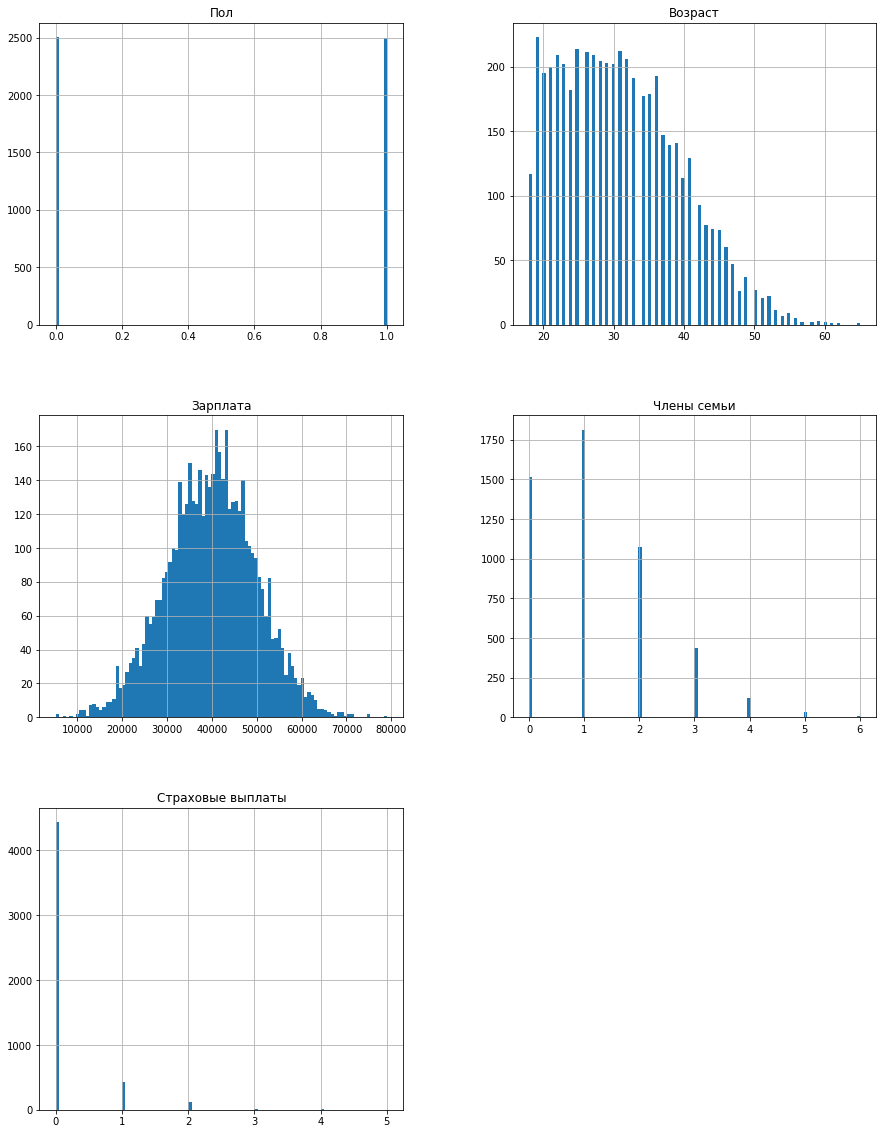

In [5]:
# с помощью функции 'hist' построим общую гистограмму
df.hist(figsize=(15, 20), bins= 100);

**5. Посмотрим статистическую информацию по каждому числовому столбцу таблицы, в датафрейме `df`.**

In [6]:
# выведем статистическую информацию
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**6. Создадим глобальную переменную для хранения размера исходного датасета.**

In [7]:
DF_SOURCE_SIZE = df.shape[0]

**Выводы**

Предварительно можно утверждать, что данных достаточно для исследования. Отсутствуют пропуски. Но, возможно, есть аномальные значения (артефакты), дубликаты (явные/неявные) и выбросы в данных. Столбцы: `Возраст`, `Зарплата`, содержат неподходящий тип данных. В названиях всех колонок (столбцов) таблицы, есть нарушение стиля.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Проверим данные на артефакты (аномалии), дубликаты (явные/неявные), пропуски, выбросы и, при нахождении, исправим. Проверим данные на несоответствие типу и, при нахождении, изменим тип.

### Стиль заголовков

**6. Выведем на экран названия столбцов:**

In [8]:
# выводим перечень названий столбцов таблицы в датафрейме 'data'
df.columns.tolist()

['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']

**7. Приведём названия столбцов таблицы в соответствии с хорошим стилем:**
 - несколько слов в названии записываются в «змеином_регистре»,
 - все символы строчные,
 - без пробелов,
 - название на латинице.

In [9]:
# переименуем название столбцов с некорректным стилем
df = df.rename(columns={'Пол'               : 'gender',
                        'Возраст'           : 'age',
                        'Зарплата'          : 'salary',
                        'Члены семьи'       : 'family_members',
                        'Страховые выплаты' : 'insurance_payments'})

In [10]:
# проверим результат переименования некорректных столбцов
df.columns.tolist()

['gender', 'age', 'salary', 'family_members', 'insurance_payments']

### Изменение типов данных

**8. Посмотрим существующие типы данных для всех столбцов.**

In [11]:
# выводим список всех столбцов таблицы и их типы
df.dtypes

gender                  int64
age                   float64
salary                float64
family_members          int64
insurance_payments      int64
dtype: object

Изменение типов данных, требуется для:
* `gender` с типа `int64` на тип `int32`;
* `age` с типа `float64` на тип `int32`;
* `salary` с типа `float64` на тип `int64`;
* `family_members` с типа `int64` на тип `int32`;
* `insurance_payments` с типа `int64` на тип `int32`.

**9. Заменим целочисленный тип данных `int64`,  в столбце `gender`,  на целочисленный тип данных `int32`.**

In [12]:
df['gender'] = df['gender'].astype('int32')

**10. Заменим вещественный тип данных `float64`,  в столбце `age`,  на целочисленный тип данных `int32`.**

In [13]:
df['age'] = df['age'].astype('int32')

**11. Заменим вещественный тип данных `float64`,  в столбце `salary`,  на целочисленный тип данных `int64`.**

In [14]:
df['salary'] = df['salary'].astype('int64')

**12. Заменим целочисленный тип данных `int64`,  в столбце `family_members`,  на целочисленный тип данных `int32`.**

In [15]:
df['family_members'] = df['family_members'].astype('int32')

**13. Заменим целочисленный тип данных `int64`,  в столбце `insurance_payments`,  на целочисленный тип данных `int32`.**

In [16]:
df['insurance_payments'] = df['insurance_payments'].astype('int32')

**14. Проверим результат преобразования типов.**

In [17]:
# выводим список всех столбцов таблицы и их типы
df.dtypes

gender                int32
age                   int32
salary                int64
family_members        int32
insurance_payments    int32
dtype: object

### Обработка выбросов

In [18]:
# функция вычисления левой и правой границы (левое и правое "крайние" значения данных) [на диаграмме размаха]
# параметр 'feature' - признак (столбец из датафрейма)
def left_right_extreme_data_boundary(feature):
    
    if(feature.empty):
        return np.nan, np.nan
    
    # вычислим квантили q3 (75%-й) и q1 (25% -й)
    q3, q1 = np.percentile(feature, [75,25])
    
    # вычислим межквантильный интервал iqr
    iqr = q3 - q1

    # рассчитаем левую и правую границу (левое и правое "крайние" значения данных)
    return np.around((q1 - iqr * 1.5), decimals=3), np.around((q3 + iqr * 1.5), decimals=3)



# функция обработки выбросов в одном признаке
def outlier_handling_in_feature(dataframe,
                                column_name,
                                min_range_limit,
                                max_range_limit,
                                bins=300):
    
    # удалим из датасета выбросы 'dataframe', из столбца 'column_name', выбросы
    dataframe = dataframe[~(dataframe[column_name] < min_range_limit) &
                          ~(dataframe[column_name] > max_range_limit)]
    
    return dataframe



def check_in_outlier(features, column_names):
    
    for column_name in column_names:
        left_border, right_border = left_right_extreme_data_boundary(features[column_name].fillna(0))
        
        if ( (left_border > features[column_name].min()) or
             (right_border < features[column_name].max()) ):
            return False
        
    return True



# функция обработки выбросов в одном датафрейме
def outlier_handling(features, column_names):
    
    work = True;
    while(work):
        for column_name in column_names:
        
            left_border, right_border = left_right_extreme_data_boundary(features[column_name].fillna(0))
        
        
            features = outlier_handling_in_feature(features,
                                                   column_name,
                                                   left_border,
                                                   right_border)
        
    
        if (features.empty or check_in_outlier(features, column_names)):
            break
    
    return features

**15. Проверим датасет: `df`, на наличии выбросов.**

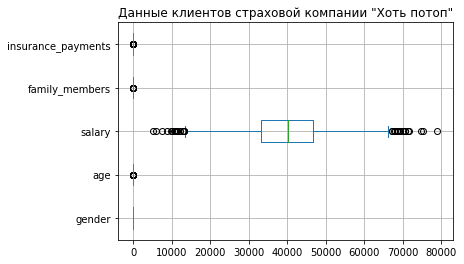

In [19]:
# построим диаграмму размаха для 'df', чтобы проверить на наличии выбросов
df.plot(kind='box', vert=False, title='Данные клиентов страховой компании "Хоть потоп"', grid=True);

В признаке (столбце) `salary`, есть выбросы, которые требуется обработать.

**16. Обработаем признак `salary` в датафрейме `df`.**

In [20]:
# удалим выбросы в целевых признаках датафрема 'df'
df_without_outlier = outlier_handling(df, ['salary'])

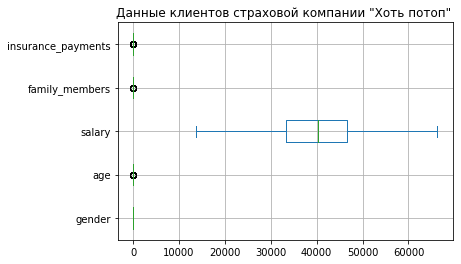

In [21]:
# построим диаграмму размаха для 'df_without_outlier', чтобы проверить на наличии выбросов
df_without_outlier.plot(kind='box', vert=False, title='Данные клиентов страховой компании "Хоть потоп" ', grid=True);

### Обработка дубликатов

**17. Проверим датафрейм `df` на наличие дубликатов.**

In [22]:
# проверяем количество строк дубликатов в 'df_without_outlier'
df_without_outlier.duplicated().sum()

153

In [23]:
# проверим, какая доля исходного датасета осталась после фильтрации, в процентах
df_without_outlier.shape[0] / DF_SOURCE_SIZE * 100

99.2

In [24]:
# удалим строки дубликаты в 'df_without_outlier'
df_without_outlier.drop_duplicates(inplace=True)

In [25]:
# проверяем количество строк дубликатов в 'df_without_outlier', после обработки
df_without_outlier.duplicated().sum()

0

**18. Проверим, какая доля исходного датасета осталась после фильтрации.**

In [26]:
# рассчитаем размер доли исходного датасета 'df', которая осталась после фильтрации, в процентах
(df_without_outlier.shape[0] / DF_SOURCE_SIZE) * 100

96.14

Размер доли исходного датасета, которая осталась после фильтрации: 

* `df_without_outlier` - **`96.14%`**.

**Выводы**

1. Предобработка обнаружила следующие проблемы в данных:

- нарушение стиля заголовков столбцов;
- несоответствие типа значений хранимым данным;
- выбросы;
- дубликаты.

 
2. Привели заголовки столбцов в соответствие с установленным стилем.
3. Преобразовали типы данных из одного в другой, где это было необходимо.
4. Обработали выбросы, где это было необходимо.
5. Удалили дубликаты.

После такой предобработки данных, исследование станет более точным.

Теперь можно перейти к подготовке данных. 

## Подготовка данных для исследования

Изучим исходное множество признаков, которые будут использованы для обучения модели, на: мультиколлинеарность признаков (высокая степень коррелированности признаков), их избыточное количество, содержание их значений (категориальные признаки, количественные признаки с разными разбросами значений).


1. Столбцы: `gender`, `age`, `salary`, `family_members` и `insurance_payments`, являются численными признаками, но имеют разный разброс значений.

При обучении модели, алгорим может решить, что признаки с большими значениями и разбросом важнее. Для избежания данной ловушки, необходимо масштабировать данные признаки с помощью метода - стандартизации данных. 

Так как, в рамках данного проекта, нам не требуется подбирать наилучшую модель, а требуется, только, найти метод преобразования признаков, который позволит защитить персональные данные и, при этом, не ухудшит качество модели машинного обучения. Мы не будет проводить преобразование из вышеуказанного пункта `2`.

**19. Создадим новый датафрейм для тестирования качества модели (ml - machine learning).**

In [27]:
df_ml = df_without_outlier

**20. Проверим предобработанные признаки каждого датафрейма, на корреляцию между другими признаками.**

Проверим предобработанные признаки каждого датафрейма, на мультиколлинеарность (корреляцию между признаками), на корреляцию между каждым признаком и целевой переменной.

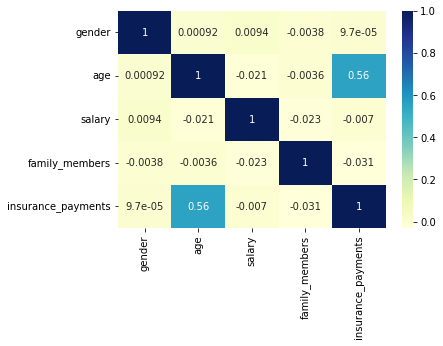

In [28]:
sns.heatmap(df_ml.corr(method='spearman'), annot=True, cmap='YlGnBu');

Какая-либо существенная корреляция в признаках датафрейма (`df`), которая может повлиять на обучение нашей модели, отсутствует (мультиколлинеарность отсутствует).

**21. Создадим отдельные датафреймы с признаками и целевым признаком.**

In [29]:
features = df_ml.drop(['insurance_payments'], axis=1)
target = df_ml['insurance_payments']

## Простое преобразование признаков <a id='simple_feature_conversion'></a>

In [30]:
# функция тестирования качества предсказания модели
def model_testing(features, target):
    # создадим модель линейной регрессии и обучим её
    lr_model = LinearRegression(n_jobs=-1)
    lr_model.fit(features, target)

    # получим предсказание линейной регрессии до преобразования признаков
    predictions = lr_model.predict(features)
    
    print("predictions", predictions)
    print("coefficients:", lr_model.coef_)
    print("rank:", lr_model.rank_)
    print("singular:", lr_model.singular_)
    print("intercept:", lr_model.intercept_)
    print("n_features_in:", lr_model.n_features_in_)

    print("MSE:", mean_squared_error(target, predictions))
    print("RMSE:", mean_squared_error(target, predictions, squared=False))
    print("R2:", r2_score(target, predictions))

**22. Проверим, изменится ли качество линейной регрессии при преобразовании признаков.**

Признаки умножим на обратимую матрицу и ответим на вопрос: "*изменится ли качество линейной регрессии?*".

In [31]:
# создадим, на основе датафрейма 'features', матрицу признаков
features_matrix = features.values

In [32]:
# посмотрим размер матрицы признаков
features_matrix.shape

(4807, 4)

In [33]:
features_matrix

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]])

In [34]:
# проверим качество предсказания модели
model_testing(features_matrix, target)

predictions [ 0.51803118  0.69389897  0.09723594 ... -0.25980252 -0.19267027
  0.05004143]
coefficients: [ 8.29518688e-03  3.61907454e-02 -2.76659828e-07 -1.38764172e-02]
rank: 4
singular: [6.68340607e+05 5.88756191e+02 7.61543313e+01 3.46628746e+01]
intercept: -0.9464858238537225
n_features_in: 4
MSE: 0.1254757658192914
RMSE: 0.35422558605963433
R2: 0.4305644070217587


In [35]:
# вычислим ранг исходной матрицы признаков
np.linalg.matrix_rank(features_matrix)

4

Количество признаков, в исходной матрице признаков, = 4. Ранг матрицы = 4. 
Из теории линейной алгебры, ранг матрицы - это максимальное количество линейно независимых векторов системы векторов. В нашем случае, система представлена матрицей, а векторами являются столбцы (признаки). Данные вектора (признаки), являются базисом данного линейного 4-х мерного пространства. Строки матрицы - объекты, где каждая строка - это вектор признаков отдельного объекта. 

Исходная матрица невырожденная (определитель не равен нулю). 

In [36]:
# построим квадратную обратимую матрицу 4 на 4
random_matrix = np.random.normal(3, 2.5, size=(features_matrix.shape[1], features_matrix.shape[1]))

In [37]:
random_matrix.shape

(4, 4)

In [38]:
# вычислим ранг 
np.linalg.matrix_rank(random_matrix)

4

Исходная  матрица `features_matrix` - невырожденная, и полученная матрица `random_matrix` - невырожденная. Данное требование предъявлется к существованию обратной матрицы. Обратная матрица, существует, только, у квадратной матрицы, определитель которой отличен от нуля.

In [39]:
# преобразуем исходные признаки (умножим исходную матрицу на обратимую матрицу)
transformed_features_matrix = features_matrix.dot(random_matrix)

# проверим ее размерность
transformed_features_matrix.shape

(4807, 4)

In [40]:
# вычислим ранг 
np.linalg.matrix_rank(transformed_features_matrix)

4

In [41]:
transformed_features_matrix

array([[232160.82282058, 265010.69496057, 289452.0704745 ,
        -50627.57798978],
       [177919.21859167, 203149.35337635, 221787.9239031 ,
        -38714.84631767],
       [ 98335.0915753 , 112295.41004606, 122572.51076004,
        -21378.93954515],
       ...,
       [158647.05343013, 181060.02280554, 197818.09244199,
        -34640.58911509],
       [153049.57725729, 174677.00085917, 190826.71949587,
        -33392.87710756],
       [190015.02987427, 216879.42735836, 236919.79669262,
        -41468.08484502]])

In [42]:
# проверим качество предсказания модели
model_testing(transformed_features_matrix, target)

predictions [ 0.51803118  0.69389897  0.09723594 ... -0.25980252 -0.19267027
  0.05004143]
coefficients: [-0.00140969  0.00592298 -0.00421584  0.00040749]
rank: 4
singular: [6.17751419e+06 4.43805496e+03 3.51399235e+02 2.25612654e+01]
intercept: -0.9464858238414037
n_features_in: 4
MSE: 0.12547576581929312
RMSE: 0.3542255860596368
R2: 0.4305644070217508


**Выводы** <a id='simple_feature_conversion_conclusions'></a> 

Результаты предсказания модели "линейной регрессии" до и после преобразования признаков:

* до    `MSE` : **0.1254757658192'914**;
* после `MSE` : **0.1254757658192'8968**;

* до    `RMSE` : **0.35422558605963'433**;
* после `RMSE` : **0.35422558605963'19**;

* до    `R2` : **0.4305644070217'587**;
* после `R2` : **0.4305644070217'6646**.

По MSE, отличие только после 13-го знака.
По RMSE, отличие только после 14-го знака.
По R2, отличие только после 13-го знака.
 
Данные отличия несущественные. Можно утверждать, что качество модели машинного обучения ("линейной регрессии"), не изменилось.




**Вопрос:** При умножении признаков на обратимую матрицу, изменится ли качество линейной регрессии?

**Ответ:** не изменится.

**Обоснование**


**Параметры линейной регрессии, полученные из исходных и преобразованных признаков, связаны следующим образом.**

*Задачу линейной регрессии*, можно сформулировать как поиск отображения из множенства объектов $X$ в множество возможных целевых признаков (таргетов):
$X \to R$.

**Задача линейной регрессии описывается формулой:** 
$$
y = w_1x_1 + w_2x_2 + ... + w_Dx_D + w_0,
$$
где:
- $\textbf{y}$ — целевая переменная (вектор целевого признака);
- $\textbf{x} = (x_1, x_2, ..., x_D)$ — вектор, соответствующий объекту выборки [в нашем случае вектор, соответствующий одному застрахованному клиенту] (вектор признаков);
- $w_1,w_2 ..., w_D, w_0$ — параметры модели; 
- $\textbf{w} = (w_1, ..., w_D)$ - вектор весов;
- $w_0$ - свободный член (сдвиг).

**Более короткая запись:**

$$y = \langle \textbf{x}, \textbf{w} \rangle + w_0$$

*Задача регресии*, в общем виде, это нахождение вектора весов $\textbf{w}\in R^{D+1}$, где $D$ - размерность пространства признаков.

**Простейший пример постановки задачи линейной регрессии - метод наименьших квадратов (МНК).**

$\sqsupset$ задан датасет $(X, \textbf{y})$,где:
- $\textbf{y} = (y_i)_{i=1}^N \in R^{N}$ - вектор значений целевой переменной;
- $X = (x_i)_{i=1}^N \in R^{NxD}, x_i \in R^{D}$ - матрица объекты-признаки, в которой i-я строка - это вектор признаков i-го объекта выборки (в нашем случае i-го клиента).

Мы хотим моделировать зависимость $y_i$ от $x_i$ как линейную функцию со свободным членом. Общий вид такой функции из $R^{D} \to R$:

$$f_w(x_i) = \langle \textbf{w}, x_i \rangle + w_0$$

Свободный член часто опускают, добавив ко всем признакам $x_i$, в качестве первого признака, признак, тождественно равный единице, а свободный член $w_0$ — к вектору $\textbf{w}$, в качестве первого его значения. Запись нашей функции упростится до вида:
- $f_w(x_i) = \langle \textbf{w}, x_i \rangle$


**Сведение к задачи оптимизации.**

Задача: требуется, чтобы для каждой пары $(x_i, y_i)$, из заданного датасета, функция $f_w(\textbf{x})$ как можно лучше приблизилась к целевому признаку $\textbf{y}$. 
Мы должны измерять качество модели и минимизировать её ошибку, как-то меняя обучаемые параметры - веса $\textbf{w}$. Для этого, необходимо выбрать функцию потерь. 

Если вектор целевого признака $\textbf{y}$ и вектор предсказанного целевого признака $f_w(\textbf{x})$ - это вектора из одного векторного евклидова пространства, то, в нашем случае, задача оптимизации, это нахождение минимального расстояния между векторами $\textbf{y}$ и $f_w(\textbf{x})$, в одном евклидовом пространстве. Чем меньше расстояние, тем меньше ошибка модели.
В качестве функции потерь, наилучшим выборов будет MSE (среднеквадратичное отклонение):

$MSE(f, X, \textbf{y}) = \frac1 N \mid \textbf{y} - X\textbf{w} \mid_{2}^2$.

Следовательно, чтобы найти лучшую модель, необходимо минимизировать: MSE по вектору весов $\textbf{w}$, по формуле:

$$\mid \textbf{y} - X\textbf{w}\mid_{2}^2 \to \min\limits_{w} \qquad \mbox{или} \qquad MSE(f, X, \textbf{y}) \to \min\limits_{w}$$.


**Решение МНК. Геометрический подход.**

$\sqsupset x^{(1)}, ..., x^{(D)}$ - столбцы  матрицы $X$ (столбцы признаков). Тогда $X\textbf{w} = w_1x^{(1)} + ... + w_Dx^{(D)}$ и задачу регрессии можно сформулировать следующим образом: найти проекцию вектора $\textbf{y}$ на подпространство, образованное векторами $L = (x^{(1)}, ..., x^{(D)})$.

Разложим $\textbf{y} = \textbf{y}_\| + \textbf{y}_\bot$, где:
- $\textbf{y}_\| = Xw$ - проекция вектора $\textbf{y}$ (или $\textbf{w}$ если использовать обозначение из $Xw$) на подпространство $L=(x^{(1)}, ..., x^{(D)})$, $L\lhd E$, $\textbf{y} \in E$ ($\textbf{w} \in E$);
- $\textbf{y}_\bot$ - ортогональная составляющая.

Тогда $\textbf{y}_\bot =  \textbf{y} - X\textbf{w} \bot x^{(1)}, ..., x^{(D)}$  

Представим полученную однородную систему уравнений в матричном виде:
$$
X^{T}(\textbf{y} - X\textbf{w}) = 0,
$$ где:
- каждый элемент столбца $X^{T}(\textbf{y} - X\textbf{w})$ - это скалярное произведение строки $X^{T}$ (= столбца $X$ = одного из $x^{(i)}$) на $\textbf{y} - X\textbf{w}$.

Выразим вектор $\textbf{w}$ из уравнения $X^{T}(\textbf{y} - X\textbf{w}) = 0$:
$$
\textbf{w} = (X^{T}X)^{-1}X^{T}\textbf{y},
$$
где:
- $(X^{T}X)$ - это матрица Грама $G$.

Данная формула работает, при условии, что матрица $(X^{T}X)$ невырожденная -  векторы признаков (стобцы матрицы) линейно независимые, и обратима, а все стобцы (векторы признаки) матрицы $X$ линейно независимы. Т. е. выполняется условие: $rgX = rg(X^{T}X) = dimX = D = dim(X^{T}X)$.


**Доказательство, что параметры линейной регрессии, полученные из исходных и преобразованных признаков, связаны.**

`random_matrix` - матрица является невырожденной, квадратной, обратимой.

При линейном преобразовании начало координат не смещается, а линии координатной сетки остаются параллельными и сохраняют исходное расстояние друг от друга. Данное утверждение следует из аксиом определения линейного пространства и определения линейного оператора. Линейные преобразования базиса (базисных векторов) пространства не изменяют состав этого базиса (количество базисных векторов и их характеристики), а лишь представляют этот базис в новом базисе (переводят их координаты в новый базис). Переход от старого базиса к новому осуществляется матрицей перехода, в которой столбцы - это координаты векторов нового базиса в старом базисе. 

Иначе говоря, "новые", преобразованные векторы будут иметь те же координаты относительно нового базиса, что и исходный вектор, относительно исходного базиса. Линейные преобразования обратимы. Следовательно, мы всегда можем вернуться к исходному базису.

Данное свойство, следует из следующих определений линейной алгебры (высшей алгебры). 
**Базисом** n-мерного линейного пространства называется упорядочная совокупность $n$ линейно независимых векторов (**базисных векторов**).

Если $\textbf{x}_1, \textbf{x}_2, ..., \textbf{x}_D$ - базис линейного D-мерного пространства $E$, то $\forall \textbf{y} \in E$, может быть представлен в виде линейной комбинации базисных векторов:
$$
\textbf{y} = w_1\textbf{x}_1 + w_2\textbf{x}_2 + ... + w_D\textbf{x}_D,
$$
и притом единственным образом, т. е. коэффициенты $w_1, ..., w_D$ определяются однозначно и называются координатами вектора $\textbf{y}$ в базисе $\textbf{x}_1, \textbf{x}_2, ..., \textbf{x}_D$. 

Из вышеуказанных вычислений, определений и утверждений, следует:
- количество признаков, в исходной матрице признаков $X$, = 4 (D=4);
- ранг матрицы ($rgX$) = 4 (D=4);
- система представлена матрицей $X$, а векторами являются столбцы (признаки) $x^{(1)}, ..., x^{(D)}$;
- данные вектора (признаки) $x^{(1)}, ..., x^{(D)}$, являются базисом данного линейного 4-х мерного пространства (D=4);
- строки матрицы - объекты, где каждая строка это вектор признаков отдельного объекта (в нашем случае отдельного клиента);
- исходная матрица $X$ невырожденная;
- линейные преобразования матрицы признаков, не изменяют базис этой матрицы, а лишь представляют его в новом базисе (переводят его координаты в новый базис);
- линейные преобразования обратимы;
- проекция вектора $\textbf{y}$ на подпространство $L=(x^{(1)}, ..., x^{(D)})$ определяется однозначно, так как $L$ - базис (ранг исходной матрицы признаков, равен исходному количеству признаков ($rgX = dim X = D$));
- найденные коэффициенты $w_1, ..., w_D$, в обоих случаях (по исходной и преобразованной матрице признаков), соответствуют условиям функции потерь (loss function): $\mid \textbf{y} - X\textbf{w}\mid_{2}^2 \to \min\limits_{w}$.




**Параметры линейной регрессии**, в нашей задаче, **связаны следующим образом**.
При проекции вектора $\textbf{y}$ на подпространство $L=(x^{(1)}, ..., x^{(D)})$, при исходной матрице признаков $X$, коэффициенты разложения $w_1, ..., w_D$ (координаты вектора $\textbf{y}$ в базисе $\textbf{x}_1, \textbf{x}_2, ..., \textbf{x}_D$), будут иметь одни значения, а при линейно преобразованной матрице признаков $X$, другие. 

**Коэффициенты разложения** $w_1, ..., w_D$ (координаты вектора $\textbf{y}$ в базисе $\textbf{x}_1, \textbf{x}_2, ..., \textbf{x}_D$) - это вектор весов ($\textbf{w} = (w_1, ..., w_D)$) модели линейной регрессии, который, одновременно, является параметрами модели. 

Т.е., координаты $w_1, ..., w_D$ вектора $\textbf{y} = \textbf{w}$, в базисе исходной матрицы признаков, будут отличаться от координат $w_1, ..., w_D$ вектора $\textbf{y} = \textbf{w}$, в базисе преобразованной матрицы признаков. Но оба этих базиса   $\in E$ (линейное векторное евклидово пространство), а связь между ними - матрица перехода (заданна алгоритмом преобразования признаков).


По этим основаниям, результат предсказания (вектор $f_w(\textbf{x})$) модели линейной регрессии, в обоих случаях (по исходной и преобразованной матрице признаков), в нашей задаче, будет одинаковым.

## Алгоритм преобразования <a id='conversion_algorithm'></a>

Необходимо выбрать алгоритм с линейным преобразованием, так как он не меняет структуру распределения.
Нелинейные преобразования - меняют.

**Алгоритм**

Обозначения:

- $X$ — матрица признаков;

- $X^{'}$ — матрица признаков после применения алгоритма преобразования;

- $a_{multiplication}$ - скаляр, на который умножаются признаки;

- $b_{addition}$ - скаляр, который добавляется к признакам;

- $P_{scale}$ — матрица растяжения, на которую умножаются признаки;

- $P_{squish}$ — матрица сжатия, на которую умножаются признаки;

- $P_{invert}$ — матрица отражения, на которую умножаются признаки;

- $P_{permutation}$ — матрица перестановки, на которую умножаются признаки;

- $P_{shear}$ — матрица сдвига, на которую умножаются признаки;

- $P_{rotate}$ — матрица поворота, на которую умножаются признаки;

- $V_{addition}$ — вектор, который складывается с признаками;

- $c_{substraction}$ - скаляр, который вычитается из признаков;

- $d_{division}$ - скаляр, на который делятся признаки;

- $V_{substraction}$ — вектор, который вычитается из признаков.

   
Формула линейного преобразования:

$$
X^{'} = (      (     (    (   (  ( (X a_{multiplication}) + b_{addition} ) P_{scale} P_{squish} P_{invert} P_{permutation} P_{shear}  ) + V_{addition}   ) P_{rotate}    ) - c_{substraction}     ) (\frac1 d_{division})      ) - V_{substraction}
$$


**Обоснование**

Данное линейное преобразование признаков, приведёт к существенному изменению их значений, что полностью скроет подлинные значения признаков и его сущность (принадлежность к конкретному признаку (пол, возраст, зарплата, количество членов его семьи и т.д.)). Но не изменит состав базиса векторов-признаков в данном линейном пространстве, которое они образуют (то есть, сохранит, доподлинно, признаки и их характеристики).

Качество предсказания модели линейной регрессии, после данного преобразования, не изменится. Обоснование и доказательство приведено в [выводе](#simple_feature_conversion_conclusions), на этапе ["Простое преобразование признаков"](#simple_feature_conversion).

## Тестирование алгоритма

Протестируем алгоритм преобразования признаков, который был предложен на [предыдущем этапе](#conversion_algorithm) исследования.

In [43]:
# функция линейного преобразования исходных признаков

#Алгоритм: 
#1. Умножение матрицы на число. 
#2. Добавление числа к матрице.
#3. Применение матриц преобразования (все, кроме поворота).
#4. Прибавление вектора. 
#5. Применение матрицы поворота.
#6. Вычитание числа из матрицы. 
#7. Деление матрицы на число.
#8. Вычитание вектора из матрицы
#
def feature_conversion(features):
    
    #=== параметры алгоритма ===
    multiplication_scalar = 3

    addition_scalar = 777
    
    # растяжение
    scale_matrix = np.array([[3, 0, 0, 0],
                             [0, 3, 0, 0],
                             [0, 0, 3, 0],
                             [0, 0, 0, 3]])
    
    # сжатие
    squish_matrix = np.array([[0.5, 0, 0, 0],
                              [0, 0.5, 0, 0],
                              [0, 0, 0.5, 0],
                              [0, 0, 0, 0.5]])
    
    # отражение
    invert_matrix = np.array([[-1, 0, 0, 0],
                              [0, -1, 0, 0],
                              [0, 0, -1, 0],
                              [0, 0, 0, -1]])
    
    # перестановка
    permutation_matrix = np.array([[0, 0, 0, 1],
                                   [0, 0, 1, 0],
                                   [0, 1, 0, 0],
                                   [1, 0, 0, 0]])
        
    # сдвиг
    shear_matrix = np.array([[777, 777, 777, 0],
                             [0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 0, 0, 1]])
    
    
    addition_vector = np.array([7, 5, 3, 1])
    
        
    theta = np.radians(90)

    rotate_xy_matrix = np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                                 [np.sin(theta), np.cos(theta), 0, 0],
                                 [0, 0, 1, 0],
                                 [0, 0, 0, 1]])

    rotate_yz_matrix = np.array([[1, 0, 0, 0],
                                 [0, np.cos(theta), np.sin(theta), 0 ],
                                 [0, -np.sin(theta), np.cos(theta), 0],
                                 [0, 0, 0, 1]])

    rotate_xz_matrix = np.array([[np.cos(theta), 0, -np.sin(theta), 0],
                                 [0, 1, 0, 0],
                                 [np.sin(theta), 0, np.cos(theta), 0],
                                 [0, 0, 0, 1]])

    rotate_xu_matrix = np.array([[np.cos(theta), 0, 0, np.sin(theta)],
                                 [0, 1, 0, 0],
                                 [0, 0, 1, 0],
                                 [-np.sin(theta), 0, 0, np.cos(theta)]])

    rotate_yu_matrix = np.array([[1, 0, 0, 0],
                                 [0, np.cos(theta), 0, -np.sin(theta)],
                                 [0, 0, 1, 0],
                                 [0, np.sin(theta), 0, np.cos(theta)]])

    rotate_zu_matrix = np.array([[1, 0, 0, 0],
                                 [0, 1, 0, 0],
                                 [0, 0, np.cos(theta), -np.sin(theta)],
                                 [0, 0, np.sin(theta), np.cos(theta)]])


    rotate_matrix = (((((rotate_xy_matrix.dot(rotate_yz_matrix))
                        .dot(rotate_xz_matrix))
                       .dot(rotate_xu_matrix))
                      .dot(rotate_yu_matrix))
                     .dot(rotate_zu_matrix))
    
    substraction_scalar = 13
    
    division_scalar = 7000

    substraction_vector = np.array([7, 5, 3, 1])
    #===========================================
    
    
    transformed_features_matrix = features * multiplication_scalar
    transformed_features_matrix += addition_scalar
    transformed_features_matrix =\
        (((((transformed_features_matrix.dot(scale_matrix))
            .dot(squish_matrix))
           .dot(invert_matrix))
          .dot(permutation_matrix))
         .dot(shear_matrix))
    
    transformed_features_matrix += addition_vector
    
    transformed_features_matrix = transformed_features_matrix.dot(rotate_matrix)
    
    transformed_features_matrix -= substraction_scalar
    
    transformed_features_matrix *= (1 / division_scalar)
        
    transformed_features_matrix -= substraction_vector
        
    return transformed_features_matrix

In [44]:
# выведем матрицу исходных признаки
features_matrix

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]])

In [45]:
# посмотрим размерность матрицы исходных признаков
features_matrix.shape

(4807, 4)

In [46]:
# вычислим ранг матрицы исходных признаков
np.linalg.matrix_rank(features_matrix)

4

In [47]:
# проверим качество предсказания модели по исходным признакам
model_testing(features_matrix, target)

predictions [ 0.51803118  0.69389897  0.09723594 ... -0.25980252 -0.19267027
  0.05004143]
coefficients: [ 8.29518688e-03  3.61907454e-02 -2.76659828e-07 -1.38764172e-02]
rank: 4
singular: [6.68340607e+05 5.88756191e+02 7.61543313e+01 3.46628746e+01]
intercept: -0.9464858238537225
n_features_in: 4
MSE: 0.1254757658192914
RMSE: 0.35422558605963433
R2: 0.4305644070217587


In [48]:
# применим алгоритм преобразования признаков
transformed_features_matrix = feature_conversion(features_matrix)

In [49]:
# выведем преобразованные признаки
transformed_features_matrix

array([[  -6.83485714,  124.86714286, -133.06428571, -162.92335714],
       [  -6.8355    ,  124.86714286, -133.0675    , -155.46621429],
       [  -6.8355    ,  124.36764286, -132.55707143, -144.03814286],
       ...,
       [  -6.8355    ,  125.36664286, -133.55028571, -153.33      ],
       [  -6.83485714,  125.86614286, -134.05107143, -153.05807143],
       [  -6.83485714,  124.86714286, -133.05592857, -157.13764286]])

In [50]:
# посмотрим размерность матрицы преобразованных признаков
transformed_features_matrix.shape

(4807, 4)

In [51]:
# вычислим ранг матрицы преобразованных признаков
np.linalg.matrix_rank(transformed_features_matrix)

4

In [52]:
# проверим качество предсказания модели по преобразованным признакам
model_testing(transformed_features_matrix, target)

predictions [ 0.51803118  0.69389897  0.09723594 ... -0.25980252 -0.19267027
  0.05004143]
coefficients: [ 1.29036240e+01 -5.63240653e+01 -5.62967150e+01  4.30359733e-04]
rank: 4
singular: [4.30393856e+02 5.37030104e+01 2.67624249e-01 2.22833909e-02]
intercept: -369.2744936552642
n_features_in: 4
MSE: 0.1254757658192741
RMSE: 0.3542255860596099
R2: 0.43056440702183707


**Выводы**

Результаты предсказания модели "линейной регрессии", до и после преобразования признаков [предложенным алгоритмом](#conversion_algorithm):

* до    `MSE` : **0.12547576581929'14**;
* после `MSE` : **0.12547576581929'615**;

* до    `RMSE` : **0.3542255860596'3433**;
* после `RMSE` : **0.3542255860596'41**;

* до    `R2` : **0.4305644070217'587**;
* после `R2` : **0.4305644070217'3704**.

По MSE, отличие только после 14-го знака.
По RMSE, отличие только после 13-го знака.
По R2, отличие только после 12-го знака.
 
Данные отличия несущественные. Можно утверждать, что качество модели машинного обучения ("линейной регрессии"), не изменилось.

## Итоги проекта

Разработан метод преобразования данных, после которого сложно восстановить персональную информацию клиентов страховой компании, но качество предсказания модели не изменилось. Данные клиентов защищены.

Результаты тестирования:

* до преобразования    `MSE` : **0.12547576581929'14**;
* после преобразования `MSE` : **0.12547576581929'615**;

* до преобразования    `RMSE` : **0.3542255860596'3433**;
* после преобразования `RMSE` : **0.3542255860596'41**;

* до преобразования    `R2` : **0.4305644070217'587**;
* после преобразования `R2` : **0.4305644070217'3704**.



*Рекомендации по улучшению*:

Данный метод преобразования данных, для их защиты, подходит для не очень ценных данных. Так как метод очень простой и, следовательно, данные легко могут быть восстановлены методами "грубой силы" или аналогичными. 


При использовании данных методов взлома, на современных супер ЭВМ или мощных вычислительных кластерах (облачные или физические), можно добиться результата за очень короткий временной период. 
При использовании квантовых компьютеров, при соответствующем ПО для них, время взлома может исчисляться в секундах.

По вышеуказанным причинам, для более ценных данных, лучше использовать более защищенные методы (алгоритмы), в контексте криптографической стойкости алгоритма.